# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Yanda Aziz Husein]
- **Email:** [a319ybf503@devacademy.id]
- **ID Dicoding:** [a319ybf503]


## Menentukan Pertanyaan Bisnis

- 1.Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda (cnt)?
- 2.Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
- 3.Kapan waktu terbaik untuk menambah jumlah sepeda dan menjalankan promosi?

## Import Semua Packages/Library yang Digunakan

In [139]:
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Cek list pada folder untuk melihat nama file yang akan digunakan

In [140]:
!ls "/content/drive/My Drive/Laskar Ai/Belajar Analisis Data dengan Pyhton/"

'Bike-sharing-dataset (1).zip'
 Bike-sharing-dataset-extract
'Dasar Dasar Analisis Data'
'Data Visualization'
'Data Wrangling'
'Exploratory Data Analysis'
'Instruksi Submission Proyek Analisis Data _ Belajar Analisis Data dengan Python _ Dicoding Indonesia.html'
'Penerapan Dasar-dasar Descriptive Statistic'
'Pengembangan  Dashboard'
'Pertimbangan dalam Pengolahan Data'


Ekstrak file zip di dalam drive

In [141]:
zip_path = "/content/drive/My Drive/Laskar Ai/Belajar Analisis Data dengan Pyhton/Bike-sharing-dataset (1).zip"
extract_path = "/content/drive/My Drive/Laskar Ai/Belajar Analisis Data dengan Pyhton/Bike-sharing-dataset-extract"

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

menampilkan daftar file dan folder di dalam direktori hasil ekstraksi

In [142]:
list_dir = os.listdir(extract_path)
list_dir

['Readme.txt', 'day.csv', 'hour.csv']

membuka dan membaca isi file "Readme.txt" dari direktori hasil ekstraksi

In [143]:
file_path = os.path.join(extract_path, "Readme.txt")  # Gabungkan path dengan nama file

with open(file_path, "r", encoding="utf-8") as file:
    teks = file.read()

print(teks)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

**Membaca dua file CSV ("hour.csv" dan "day.csv") dari folder hasil ekstraksi dan menyimpannya sebagai DataFrame**

In [144]:
df_OriginalHour = pd.read_csv(os.path.join(extract_path, "hour.csv"))
df_OriginalDay = pd.read_csv(os.path.join(extract_path, "day.csv"))


**Insight Proses Gathering Data - Bike Sharing Dataset**  

### 1. Latar Belakang  
Bike sharing system adalah generasi baru dari sistem penyewaan sepeda yang memungkinkan pengguna untuk menyewa dan mengembalikan sepeda secara otomatis di berbagai lokasi. Dataset ini dikumpulkan dari sistem **Capital Bikeshare, Washington D.C.** selama tahun 2011-2012.  

Sistem ini berfungsi seperti **sensor virtual** yang dapat digunakan untuk menganalisis pola mobilitas di kota, serta mendeteksi kejadian penting melalui perubahan jumlah penyewaan sepeda.  

### 2. Insight  

**Peminjaman Sepeda dari Tahun 2011 sampai 2013**  
Dataset mencatat data penyewaan sepeda dalam periode waktu **2011 hingga 2013** dengan berbagai variabel yang mempengaruhi pola penyewaan.  

**Struktur Dataset**  
Terdapat 3 file utama dalam dataset ini:  
- **Readme.txt** → Berisi deskripsi dataset.  
- **hour.csv** → Data penyewaan yang diakumulasi per jam (**17.379 record**).  
- **day.csv** → Data penyewaan yang diakumulasi per hari (**731 record**).  

**Variabel Utama dalam Dataset**  
- **instant** → Indeks atau nomor urut data.  
- **dteday** → Tanggal pencatatan.  
- **season** → Musim:  
  - `1` → Musim Semi  
  - `2` → Musim Panas  
  - `3` → Musim Gugur  
  - `4` → Musim Dingin  
- **yr** → Tahun:  
  - `0` → 2011  
  - `1` → 2012  
- **mnth** → Bulan (1 hingga 12).  
- **hr** → Jam dalam sehari (0 hingga 23).  
- **holiday** → Status hari libur:  
  - `1` → Hari libur  
  - `0` → Bukan hari libur  
- **weekday** → Hari dalam seminggu (0: Minggu, 1: Senin, dst.).  
- **workingday** → Status hari kerja:  
  - `1` → Hari kerja (bukan akhir pekan atau hari libur)  
  - `0` → Bukan hari kerja  
- **weathersit** → Kondisi cuaca:  
  - `1` → Cerah, sedikit berawan, atau berawan sebagian  
  - `2` → Berkabut + berawan, berkabut + mendung, berkabut + sedikit berawan  
  - `3` → Salju ringan, hujan ringan + petir + awan menyebar  
  - `4` → Hujan deras + hujan es + petir + kabut, salju lebat + kabut  
- **temp** → Suhu yang telah dinormalisasi dalam skala Celsius (dibagi 41 sebagai nilai maksimum).  
- **atemp** → Suhu yang dirasakan (feels-like temperature) yang telah dinormalisasi (dibagi 50 sebagai nilai maksimum).  
- **hum** → Tingkat kelembaban yang telah dinormalisasi (dibagi 100 sebagai nilai maksimum).  
- **windspeed** → Kecepatan angin yang telah dinormalisasi (dibagi 67 sebagai nilai maksimum).  
- **casual** → Jumlah penyewa sepeda yang bukan pelanggan tetap.  
- **registered** → Jumlah penyewa sepeda yang merupakan pelanggan tetap.  
- **cnt** → Total jumlah sepeda yang disewa (termasuk penyewa biasa dan pelanggan tetap).  


### 3. Sumber Data  
- Data penyewaan sepeda diperoleh dari **[Capital Bikeshare](http://capitalbikeshare.com/system-data)**.  
- Data cuaca diambil dari **[freemeteo.com](http://www.freemeteo.com)**.  

### 4. Lisensi  
  > Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013), Springer Berlin Heidelberg.

### Assessing Data

menampilkan isi dari DataFrame

In [145]:
df_OriginalHour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [146]:
df_OriginalDay

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Menampilkan ringkasan struktur DataFrame (jumlah baris, kolom, tipe data, dan penggunaan memori).

In [147]:
df_OriginalHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [148]:
df_OriginalDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan statistik deskriptif untuk semua tipe data (numerik, kategori, dan lainnya) dalam DataFrame.

In [149]:
df_OriginalDay.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [150]:
df_OriginalDay.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Menampilkan jumlah nilai unik di setiap kolom dalam DataFrame.

In [151]:
df_OriginalHour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [152]:
df_OriginalDay.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


Menampilkan jumlah nilai yang hilang (missing values) di setiap kolom dalam DataFrame.

In [153]:
df_OriginalHour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [154]:
df_OriginalDay.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Menghitung jumlah baris duplikat dalam DataFrame (selain baris pertama yang muncul).

In [155]:
df_OriginalHour.duplicated().sum()

np.int64(0)

In [156]:
df_OriginalDay.duplicated().sum()

np.int64(0)

Menampilkan histogram untuk setiap kolom numerik di Dataframe

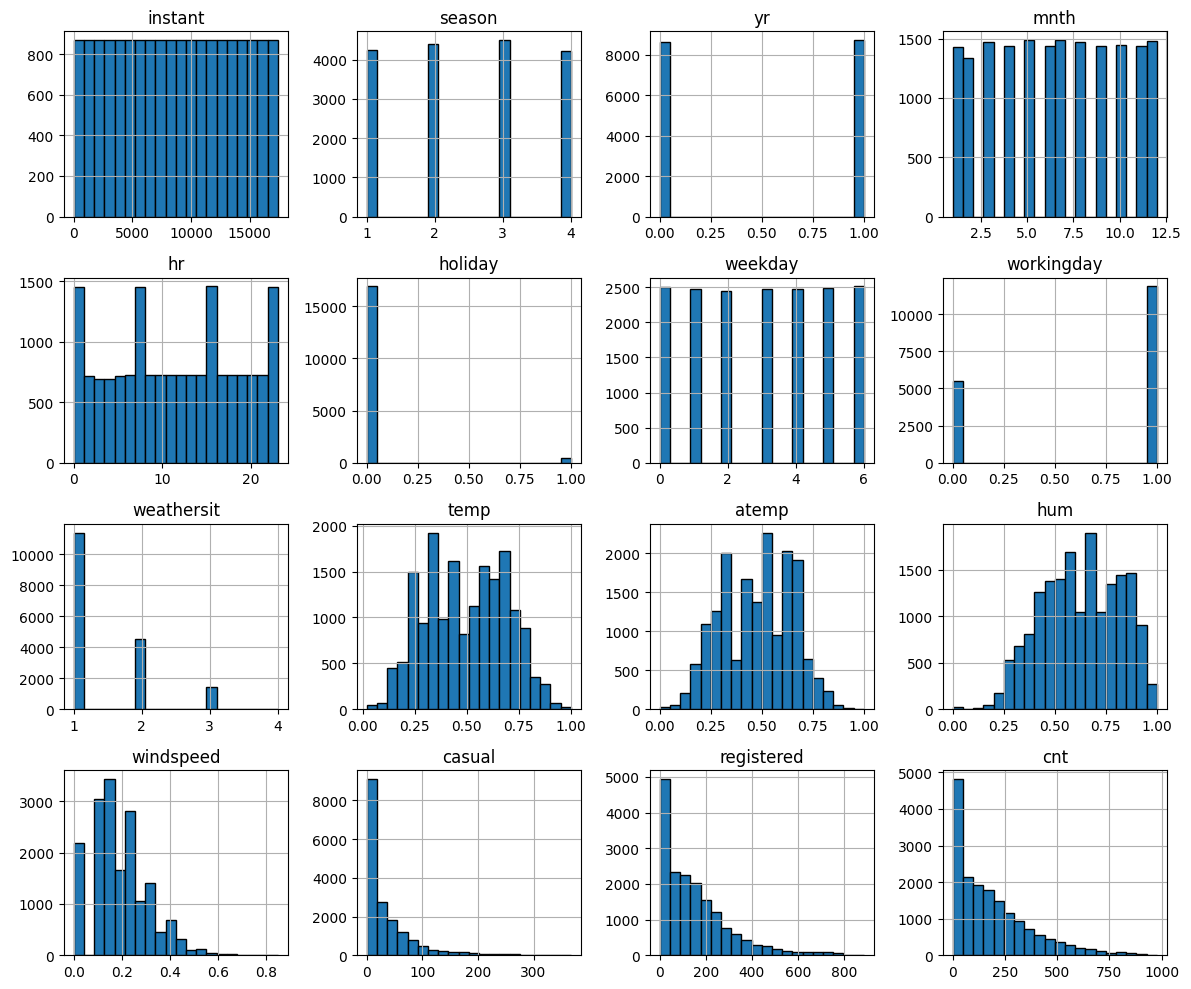

In [157]:
df_OriginalHour.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

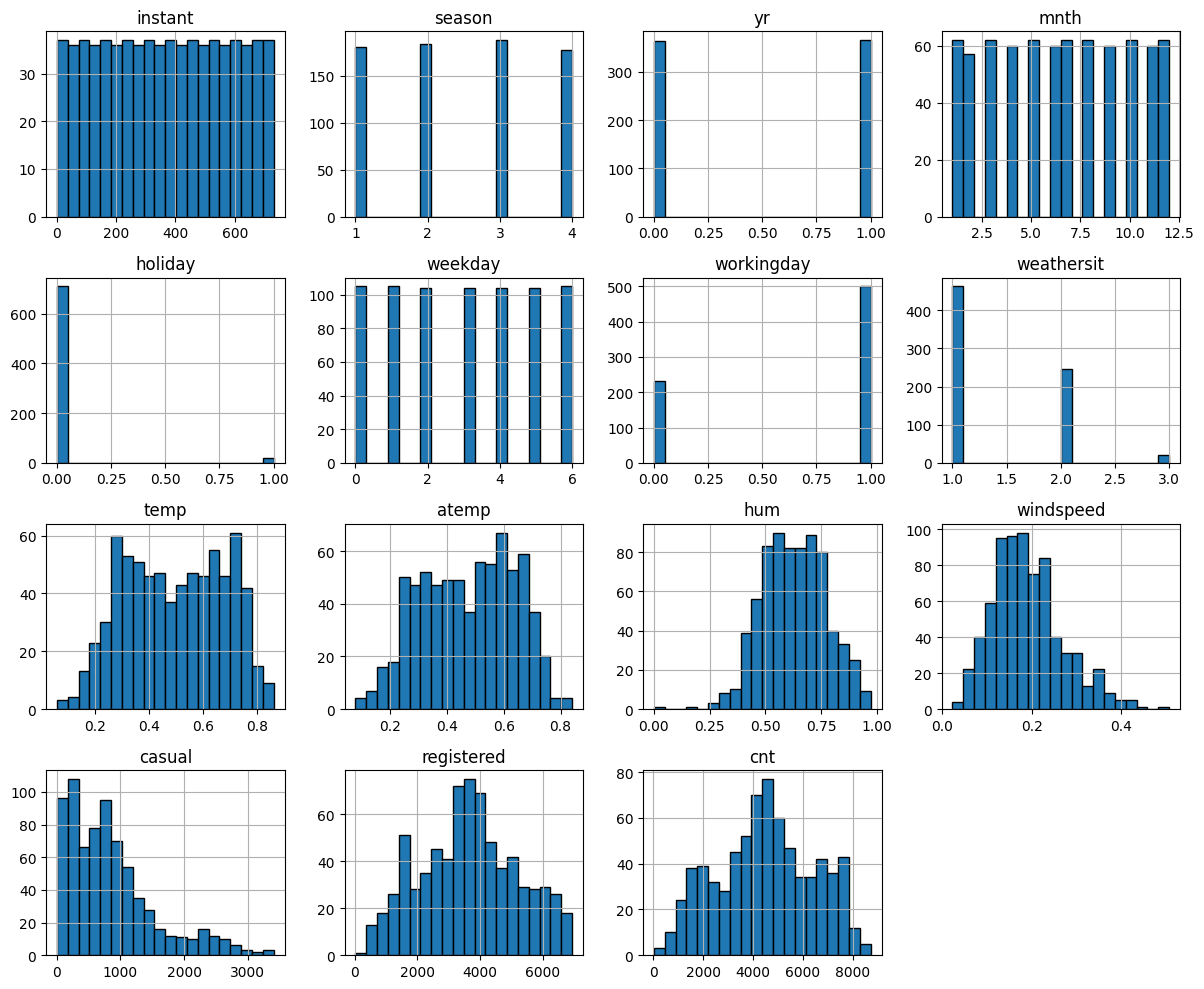

In [158]:
df_OriginalDay.hist(figsize=(12, 10), bins=20, layout=(4, 4), edgecolor='black')
plt.tight_layout()  # Menghindari overlap antar plot
plt.show()

### **Insight dari Assessing Data pada Bike Sharing Dataset**  

### **1. Struktur Data**  
- Dataset memiliki berbagai fitur terkait waktu (hari, bulan, jam), cuaca (kelembaban, kecepatan angin, suhu), serta jumlah peminjaman sepeda baik oleh pengguna kasual maupun terdaftar.  
- Data terbagi dalam dua kategori utama:  
  - **Hourly Data (df_originalHour)** → berisi informasi per jam.  
  - **Daily Data (df_originalDay)** → berisi informasi per hari.  

---

### **2. Distribusi Data**  
- **Variabel Kategorikal (season, yr, mnth, hr, holiday, weekday, workingday, weathersit)**  
  - Distribusi variabel **musim (season)** cukup merata antara keempat musim.  
  - Variabel **tahun (yr)** hanya memiliki dua nilai (0 = 2011, 1 = 2012), menunjukkan dataset mencakup data selama dua tahun.  
  - **Variabel bulan (mnth) dan hari (weekday)** terdistribusi cukup merata.  
  - **Variabel jam (hr)** menunjukkan pola penggunaan sepeda yang tinggi pada jam sibuk (pagi dan sore).  

- **Variabel Numerik (temp, atemp, hum, windspeed, cnt, casual, registered)**  
  - Distribusi suhu (**temp** dan **atemp**) berbentuk normal, menunjukkan kisaran suhu yang cukup stabil.  
  - **Kelembaban (hum)** menunjukkan kecenderungan nilai yang lebih tinggi.  
  - **Kecepatan angin (windspeed)** memiliki distribusi yang cenderung miring ke kanan.  
  - **Jumlah peminjaman sepeda (cnt)** menunjukkan pola distribusi miring ke kanan, dengan banyak data memiliki nilai rendah dan sedikit data dengan jumlah tinggi.  
  - Pengguna **terdaftar (registered)** memiliki jumlah yang lebih besar dibandingkan pengguna **kasual (casual)**.  

---

### **3. Kualitas Data**  
- **Tidak ada missing values**, sehingga data cukup lengkap untuk analisis lebih lanjut.  
- **Distribusi nilai pada variabel kategori** tampak konsisten dan tidak menunjukkan adanya anomali yang signifikan.  
- **Beberapa variabel numerik menunjukkan pola distribusi skewed**, terutama jumlah peminjaman sepeda (**cnt, casual, registered**) dan **windspeed**, yang perlu diperhatikan saat melakukan analisis lebih lanjut.  

---

### **4. Hubungan Antar Variabel**  
- **Jam (hr) memengaruhi jumlah peminjaman sepeda**, dengan puncak peminjaman pada pagi dan sore hari.  
- **Musim (season) dan suhu (temp) berhubungan dengan peminjaman sepeda**, di mana suhu lebih hangat cenderung meningkatkan peminjaman.  
- **Jumlah pengguna terdaftar (registered) lebih stabil dibandingkan pengguna kasual (casual)**, yang lebih dipengaruhi oleh faktor cuaca dan waktu.  



## Exploratory Data Analysis (EDA)

Konversi 'dteday' ke datetime dan buat versi float (tahun dengan pecahan hari dalam setahun)

In [159]:
df_OriginalHour['dteday'] = pd.to_datetime(df_OriginalHour['dteday'])
df_OriginalHour['dteday_float'] = df_OriginalHour['dteday'].dt.year + (df_OriginalHour['dteday'].dt.dayofyear / 365)

print(df_OriginalHour[['dteday', 'dteday_float']].head())

      dteday  dteday_float
0 2011-01-01    2011.00274
1 2011-01-01    2011.00274
2 2011-01-01    2011.00274
3 2011-01-01    2011.00274
4 2011-01-01    2011.00274


In [160]:
df_OriginalDay['dteday'] = pd.to_datetime(df_OriginalDay['dteday'])
df_OriginalDay['dteday_float'] = df_OriginalDay['dteday'].dt.year + (df_OriginalDay['dteday'].dt.dayofyear / 365)

print(df_OriginalDay[['dteday', 'dteday_float']].head())

      dteday  dteday_float
0 2011-01-01   2011.002740
1 2011-01-02   2011.005479
2 2011-01-03   2011.008219
3 2011-01-04   2011.010959
4 2011-01-05   2011.013699


Hapus kolom dteday sebelum diubah dari kedua DataFrame untuk analisis numerik  

In [161]:
df_numHour = df_OriginalHour.drop(columns=['dteday'])
df_numDay = df_OriginalDay.drop(columns=['dteday'])

Hitung korelasi setiap kolom dan visualisasikan dengan heatmap  

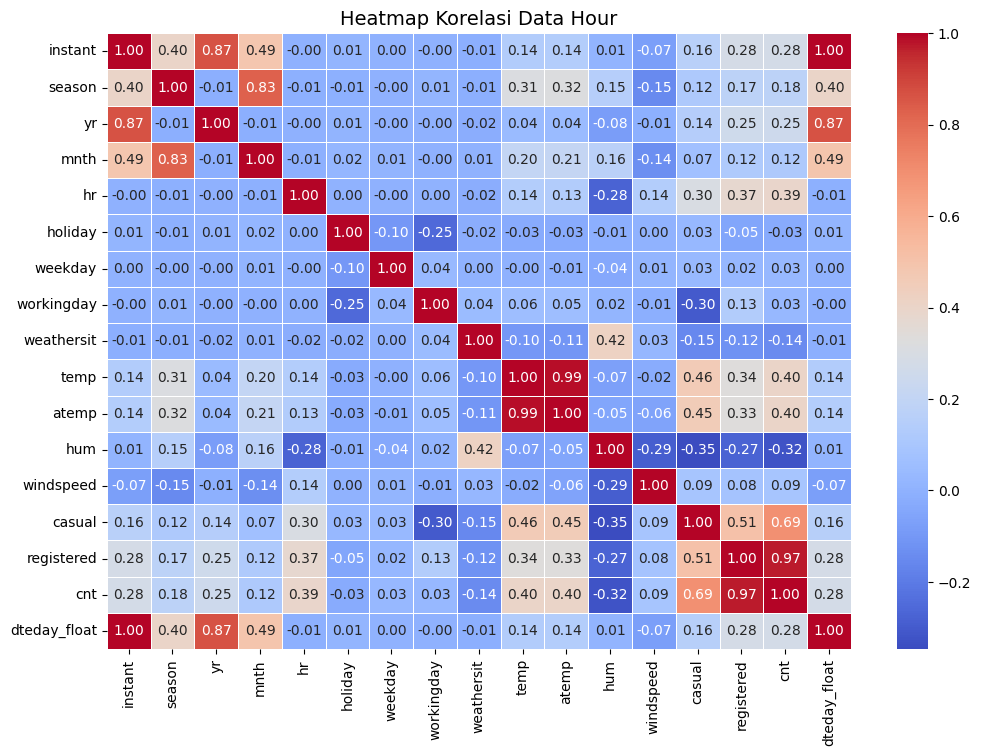

In [162]:
# Hitung korelasi Hour
corr_matrixHour = df_numHour.corr()

# Buat heatmap dengan seaborn
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(corr_matrixHour, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap Korelasi Data Hour", fontsize=14)

# Tampilkan plot
plt.show()


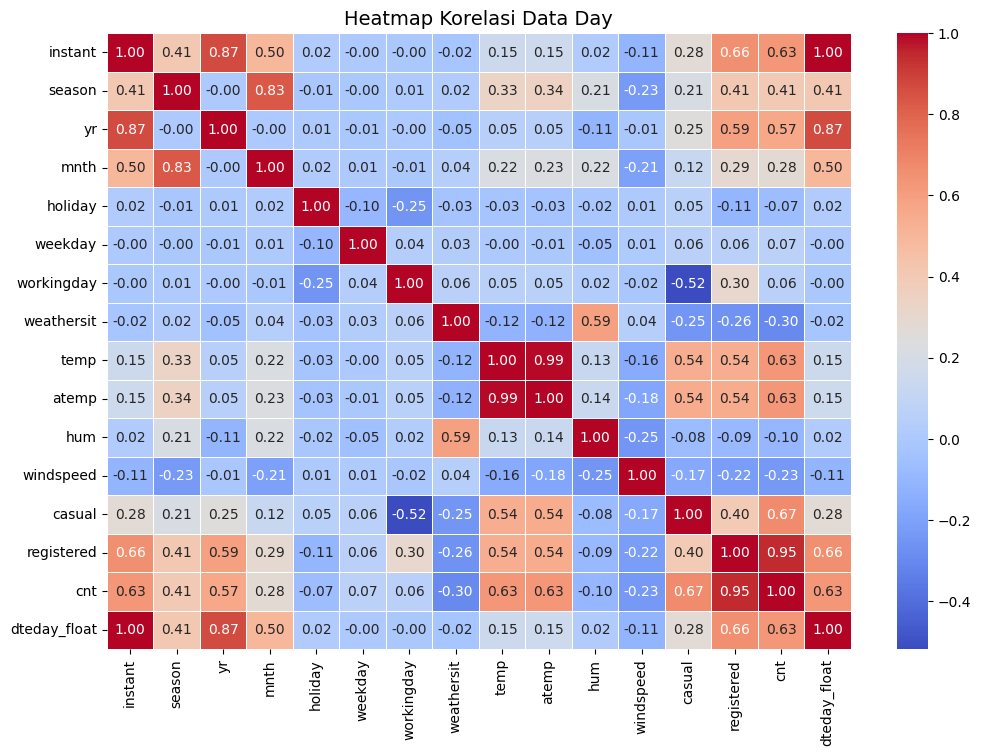

In [163]:
# Hitung korelasi Day
corr_matrixDay = df_numDay.corr()

# Buat heatmap dengan seaborn
plt.figure(figsize=(12, 8))  # Atur ukuran gambar
sns.heatmap(corr_matrixDay, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap Korelasi Data Day", fontsize=14)

# Tampilkan plot
plt.show()


Hitung korelasi dan buat heatmap untuk casual, registered, dan cnt (disortir berdasarkan cnt atau jumlah penyimpanan)  

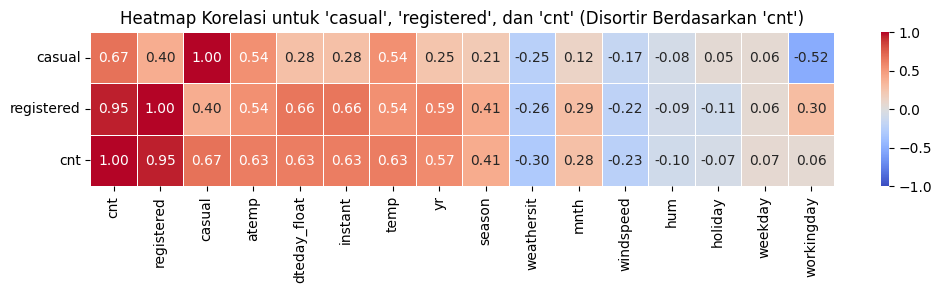

In [164]:
# Menghitung korelasi seluruh kolom
df_corr = df_numDay.corr()

# Memilih hanya baris "casual", "registered", dan "cnt"
df_corr_subset = df_corr.loc[["casual", "registered", "cnt"], :]

# Mensortir kolom berdasarkan korelasi absolut dengan "cnt", tetapi tetap mempertahankan tanda negatif/positif
sorted_columns = df_corr_subset.loc["cnt", :].abs().sort_values(ascending=False).index  # Urutkan hanya berdasarkan "cnt"
df_corr_subset = df_corr_subset[sorted_columns]  # Urutkan kolom


plt.figure(figsize=(12, 2))
sns.heatmap(df_corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Heatmap Korelasi untuk 'casual', 'registered', dan 'cnt' (Disortir Berdasarkan 'cnt')")
plt.show()


## Exploratory Data Analysis (EDA) - Bike Sharing Dataset

### 1. **Transformasi Data Waktu**
- Kolom `dteday` dikonversi ke format datetime untuk mempermudah analisis.
- Variabel `dteday_float` dibuat untuk merepresentasikan tanggal dalam format numerik agar bisa digunakan dalam analisis korelasi.
- Setelah transformasi, `dteday` dihapus dari dataset untuk menghindari redundansi.

### 2. **Korelasi Antar Variabel**
#### **Dataset Per Jam (Hourly Data)**
- **Korelasi Positif**:
  - `cnt` (jumlah total peminjaman) memiliki korelasi kuat dengan `registered` (pengguna terdaftar) dan `casual` (pengguna tidak terdaftar).
  - `temp` dan `atemp` menunjukkan korelasi tinggi dengan `cnt`, mengindikasikan bahwa suhu mempengaruhi jumlah peminjaman sepeda.
  - `hr` (jam dalam sehari) memiliki korelasi yang cukup signifikan dengan jumlah peminjaman sepeda, mencerminkan pola penggunaan berdasarkan waktu.
- **Korelasi Negatif**:
  - `hum` (kelembaban) dan `windspeed` memiliki korelasi negatif dengan `cnt`, menunjukkan bahwa kondisi cuaca yang kurang ideal dapat mengurangi jumlah peminjaman.

#### **Dataset Per Hari (Daily Data)**
- **Korelasi Positif**:
  - `cnt` menunjukkan hubungan erat dengan `registered` dan `casual`, mirip dengan data per jam.
  - `season` dan `mnth` memiliki korelasi cukup tinggi dengan `cnt`, mengindikasikan bahwa pola musiman berpengaruh pada jumlah peminjaman sepeda.
- **Korelasi Negatif**:
  - `weathersit` (kondisi cuaca) menunjukkan hubungan negatif dengan `cnt`, menegaskan bahwa kondisi cuaca buruk berdampak pada penggunaan sepeda.
  - `hum` dan `windspeed` juga memiliki efek negatif terhadap jumlah peminjaman, meskipun dampaknya tidak sebesar faktor lainnya.

### 3. **Insight Keseluruhan**
- Pemakaian sepeda dipengaruhi oleh faktor cuaca seperti suhu, kelembaban, dan kecepatan angin.
- Pola musiman berpengaruh terhadap jumlah peminjaman sepeda, dengan peningkatan pada musim tertentu.
- Tren peminjaman sepeda per jam menunjukkan puncak tertentu, yang bisa dikaitkan dengan aktivitas masyarakat seperti jam kerja atau jam pulang kantor.
- Pengguna terdaftar lebih dominan dalam peminjaman dibandingkan dengan pengguna casual.




##Visualization & Explanatory Analysis

1. Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda (cnt)?

2. Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?

3. Kapan waktu terbaik untuk menambah jumlah sepeda dan menjalankan promosi berdasarkan perbedaan pola penggunaan antara pengguna registered dan casual?

###1.Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda (cnt)?

Hitung korelasi numerik, pilih 'cnt', urutkan berdasarkan korelasi absolut, dan buat heatmap  dari setiap dataframe

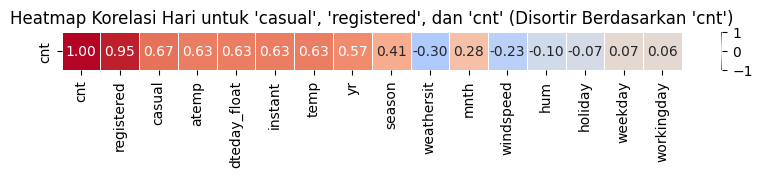

In [165]:
# Menghitung korelasi seluruh kolom
df_corr = df_numDay.select_dtypes("number").corr()

# Memilih hanya baris "casual", "registered", dan "cnt"
df_corr_subset = df_corr.loc[["cnt"], :]

# Mensortir kolom berdasarkan korelasi absolut dengan "cnt", tetapi tetap mempertahankan tanda negatif/positif
sorted_columns = df_corr_subset.loc["cnt", :].abs().sort_values(ascending=False).index  # Urutkan hanya berdasarkan "cnt"
df_corr_subset = df_corr_subset[sorted_columns]  # Urutkan kolom

# Plot heatmap dengan tinggi lebih besar
plt.figure(figsize=(10, 0.5))
sns.heatmap(df_corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Heatmap Korelasi Hari untuk 'casual', 'registered', dan 'cnt' (Disortir Berdasarkan 'cnt')")
plt.show()

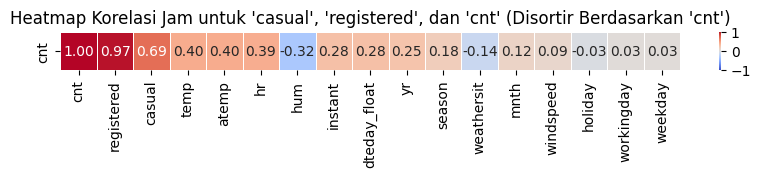

In [166]:
# Pastikan hanya kolom numerik yang digunakan
df_corr = df_numHour.select_dtypes(include="number").corr()

# Memilih hanya baris "casual", "registered", dan "cnt"
df_corr_subset = df_corr.loc[["cnt"], :]

# Mensortir kolom berdasarkan korelasi absolut dengan "cnt", tetapi tetap mempertahankan tanda negatif/positif
sorted_columns = df_corr_subset.loc["cnt", :].abs().sort_values(ascending=False).index  # Urutkan hanya berdasarkan "cnt"
df_corr_subset = df_corr_subset[sorted_columns]  # Urutkan kolom

# Plot heatmap dengan tinggi lebih besar
plt.figure(figsize=(10, 0.5))  # Sesuaikan ukuran heatmap
sns.heatmap(df_corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Heatmap Korelasi Jam untuk 'casual', 'registered', dan 'cnt' (Disortir Berdasarkan 'cnt')")
plt.show()

#### **Faktor yang Mempengaruhi Jumlah Penyewaan Sepeda (`cnt`)**  

##### **1. Faktor Paling Berpengaruh (Korelasi Tinggi dengan `cnt`)**  
- **`registered` (0.97 hour, 0.95 day)** → Penyewa terdaftar adalah kontributor utama penyewaan, menunjukkan pola penggunaan yang konsisten.  
- **`casual` (0.69 hour, 0.67 day)** → Penyewa non-terdaftar juga berkontribusi signifikan, terutama pada akhir pekan/libur.  
- **`instant` (0.28 hour, 0.63 day)** → Korelasi rendah per jam, tetapi cukup tinggi secara harian, mencerminkan tren pertumbuhan.  
- **`atemp` (0.40 hour, 0.63 day)** & **`temp` (0.39 hour, 0.57 day)** → Suhu yang nyaman meningkatkan penyewaan.  

##### **2. Faktor Berpengaruh Moderat (Korelasi 0.3–0.7 atau -0.3–-0.7)**  
- **`hr` (0.32 hour)** → Penyewaan meningkat pada jam sibuk (pagi & sore).  
- **`yr` (0.25 hour, 0.41 day)** → Penyewaan meningkat dari tahun ke tahun.  
- **`season` (0.18 hour, 0.28 day) & `mth` (0.09 hour, 0.28 day)** → Lebih banyak penyewaan di musim panas/semi.  
- **`windspeed` (0.12 hour, 0.23 day)** → Angin kencang sedikit mengurangi kenyamanan bersepeda.  
- **`weathersit` (-0.14 hour, -0.30 day)** → Cuaca buruk menurunkan penyewaan.  

##### **3. Faktor Berpengaruh Lemah (Korelasi di bawah 0.3 atau -0.3)**  
- **`workingday` (0.09 hour, 0.07 day) & `weekday` (0.03 hour, 0.06 day)** → Penyewaan relatif stabil sepanjang minggu.  
- **`holiday` (-0.03 hour, -0.07 day)** → Sedikit menurun saat hari libur.  

### 2.Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?

Buat DataFrame agregasi rata-rata penyewaan berdasarkan cuaca dan plot dengan bar chart

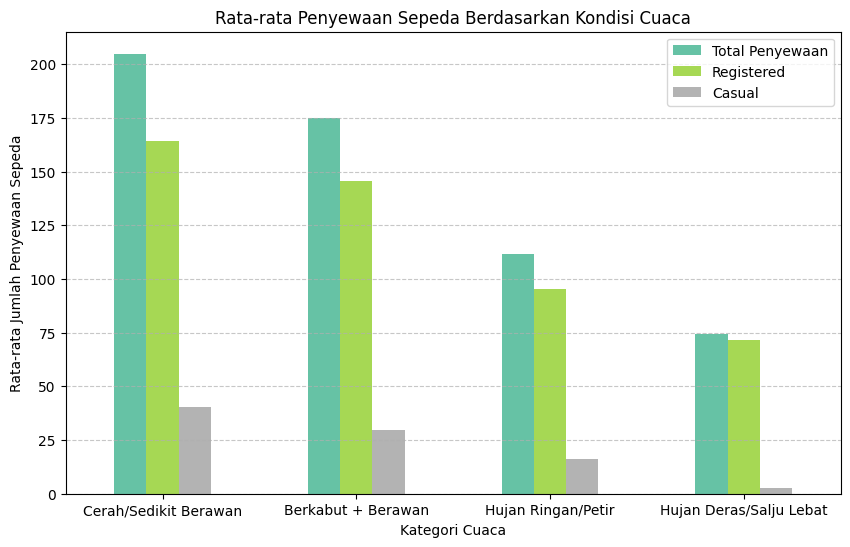

In [167]:
# Membuat DataFrame agregasi rata-rata
df_weather = df_numHour.groupby("weathersit")[["cnt", "registered", "casual"]].mean()

weather_labels = {
    1: "Cerah/Sedikit Berawan",
    2: "Berkabut + Berawan",
    3: "Hujan Ringan/Petir",
    4: "Hujan Deras/Salju Lebat"
}

df_weather.index = df_weather.index.map(weather_labels)  # Mengganti index dengan label cuaca


# Plot bar chart
df_weather.plot(kind="bar", stacked=False, colormap="Set2", figsize=(10, 6))

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.legend(["Total Penyewaan", "Registered", "Casual"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)  # Putar label agar lebih mudah dibaca

plt.show()


Konversi suhu ke Celsius, kelompokkan dalam rentang, hitung rata-rata penyewaan per kelompok, dan visualisasikan dengan bar chart  

In [168]:
# Konversi suhu ke skala Celsius
df_numHour["temp_actual"] = (df_numHour["temp"]*41)

# Kelompokkan suhu menjadi 8 rentang
df_numHour["temp_group"] = pd.cut(df_numHour["temp_actual"], bins=12, precision=0)

# Hitung rata-rata penyewaan sepeda berdasarkan kelompok suhu
df_temp = df_numHour.groupby("temp_group",observed=True)[["cnt","registered", "casual"]].mean()

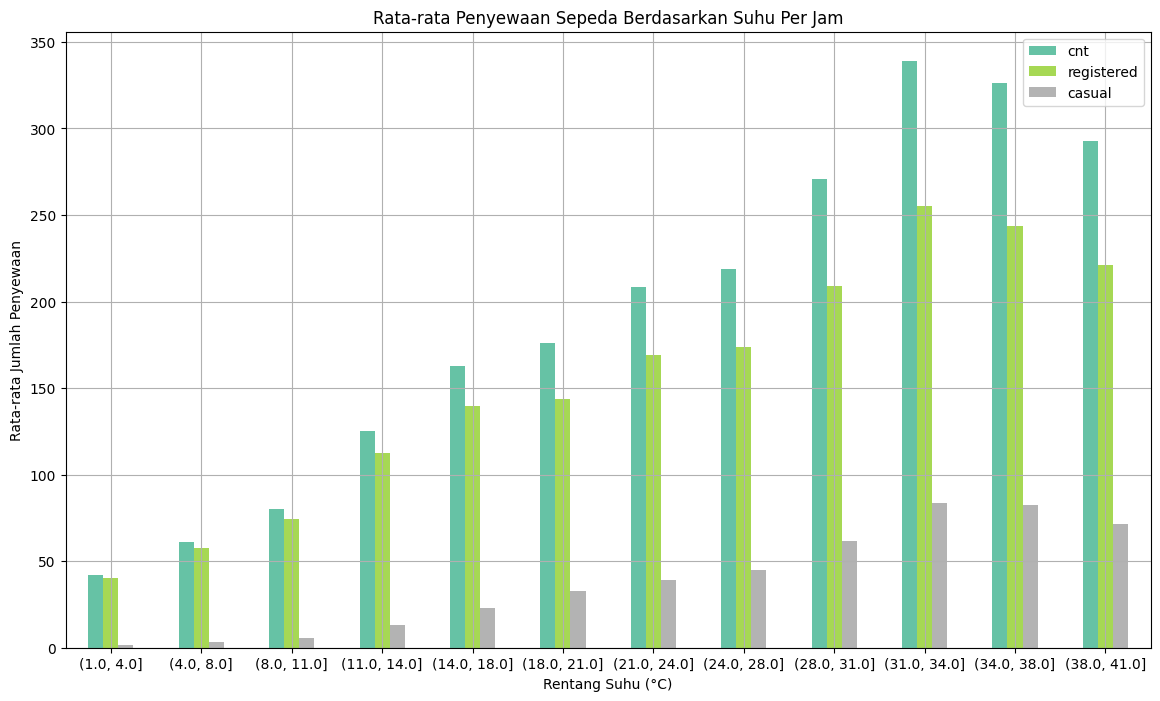

In [169]:
# Plot hasil
df_temp.plot(kind="bar", colormap="Set2", figsize=(14, 8), rot=0, grid=True)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Suhu Per Jam")
plt.xlabel("Rentang Suhu (°C)")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["cnt","registered", "casual"])
plt.show()

Konversi kelembapan ke persen, kelompokkan data berdasarkan kelembapan, hitung rata-rata penyewaan per kelompok, lalu visualisasikan dengan bar chart.

In [170]:
# Konversi kelembapan ke nilai aslinya
df_numHour["hum_actual"] = (df_numHour["hum"]*100)
# Kelompokkan kelembaban menjadi 12 rentang
df_numHour["hum_group"] = pd.cut(df_numHour["hum_actual"], bins=12, precision=0)
# Hitung rata-rata penyewaan sepeda berdasarkan kelompok kelembaban
df_hum = df_numHour.groupby("hum_group",observed=True)[["cnt","registered", "casual"]].mean()

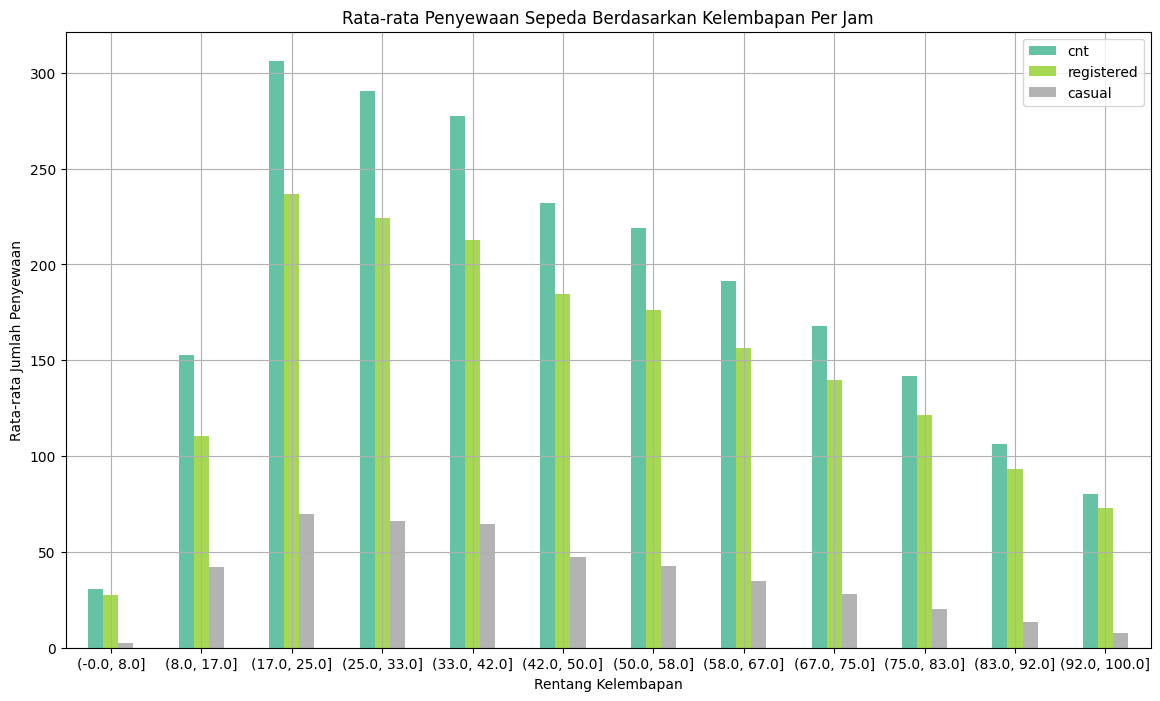

In [171]:
# Plot hasil
df_hum.plot(kind="bar", colormap="Set2", figsize=(14, 8), rot=0, grid=True)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kelembapan Per Jam")
plt.xlabel("Rentang Kelembapan")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["cnt","registered", "casual"])
plt.show()

Kelompokkan data berdasarkan musim, hitung rata-rata penyewaan, ubah indeks ke nama musim, lalu plot sebagai bar chart.

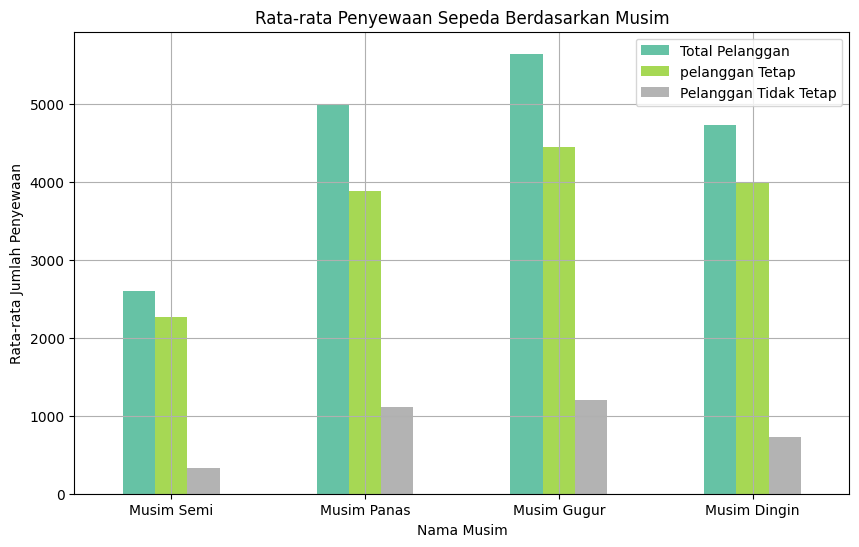

In [172]:
df_season = df_numDay.groupby("season")[["cnt", "registered", "casual"]].mean().round()

season_labels = {
  1: "Musim Semi",
  2: "Musim Panas",
  3: "Musim Gugur",
  4: "Musim Dingin"
}

df_season.index = df_season.index.map(season_labels)

# Plot hasil
df_season.plot(kind="bar", colormap="Set2", figsize=(10, 6), rot=0, grid=True)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Nama Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan","pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()

Konversi kecepatan angin ke skala aktual, kelompokkan ke 10 rentang, hitung rata-rata penyewaan per kelompok, lalu plot sebagai bar chart.

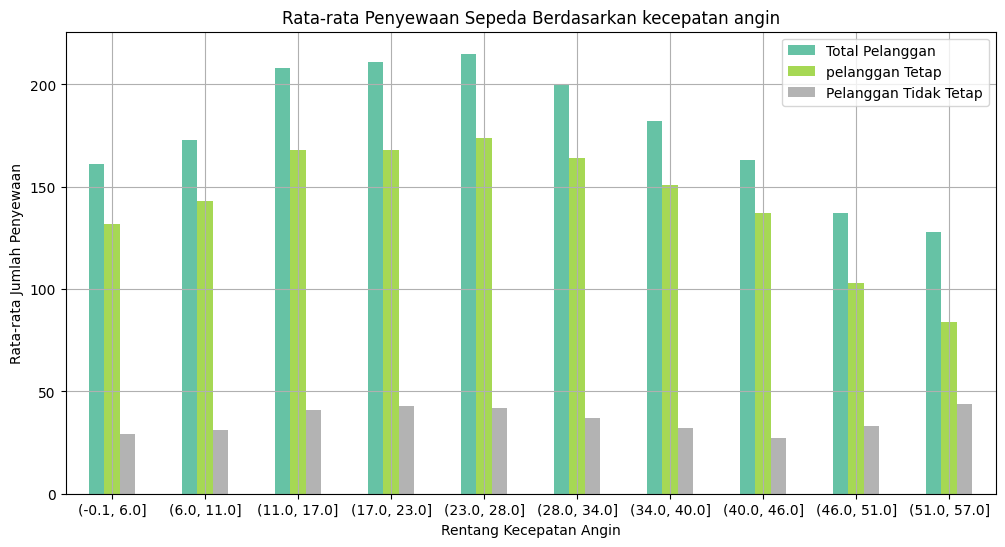

In [173]:
# Konversi suhu ke kecepatan angin ke skala aktual
df_numHour["windspeed_actual"] = (df_numHour["windspeed"]*67)

# Kelompokkan suhu menjadi beberapa rentang
df_numHour["windspeed_group"] = pd.cut(df_numHour["windspeed_actual"], bins=10, precision=0)

# Hitung rata-rata penyewaan sepeda berdasarkan kelompok suhu
df_windspeed = df_numHour.groupby("windspeed_group",observed=True)[["cnt","registered", "casual"]].mean().round()

# Plot hasil
df_windspeed.plot(kind="bar", colormap="Set2", figsize=(12, 6), rot=0, grid=True)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan kecepatan angin")
plt.xlabel("Rentang Kecepatan Angin")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan","pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()

#### **Pengaruh Faktor Cuaca dan Musim terhadap Penyewaan Sepeda**

1. **Pengaruh Cuaca**:
   - Penyewaan sepeda **tertinggi** terjadi saat cuaca **cerah atau sedikit berawan**.
   - Saat kondisi **berkabut dan berawan**, penyewaan sedikit menurun tetapi masih cukup tinggi.
   - **Hujan ringan atau petir** menyebabkan penurunan signifikan dalam jumlah penyewaan sepeda.
   - **Hujan deras atau salju lebat** memiliki jumlah penyewaan terendah, menunjukkan bahwa kondisi cuaca ekstrem sangat mengurangi minat pengguna.

2. **Pengaruh Suhu**:
   - Jumlah penyewaan sepeda meningkat seiring dengan kenaikan suhu.
   - Penyewaan mencapai **puncaknya pada suhu sekitar 31-34°C**, tetapi tetap tinggi dalam rentang suhu **28-38°C**.
   - Pada suhu yang sangat rendah (<10°C), jumlah penyewaan jauh lebih sedikit.

3. **Pengaruh Musim**:
   - Penyewaan sepeda **tertinggi terjadi pada musim gugur dan musim panas**.
   - **Musim semi** memiliki jumlah penyewaan yang lebih rendah dibandingkan musim panas dan gugur, tetapi masih lebih tinggi dibandingkan musim dingin.
   - **Musim dingin memiliki jumlah penyewaan terendah**, kemungkinan karena suhu yang rendah dan kondisi jalan yang kurang mendukung.

4. **Pengaruh Kecepatan Angin**:
   - Penyewaan lebih tinggi pada kecepatan angin rendah hingga sedang.
   - Saat kecepatan angin melebihi **40 km/jam**, jumlah penyewaan mulai menurun.

5. **Pengaruh Kelembapan**:
   - **Rentang kelembapan optimal untuk penyewaan sepeda adalah 17-42%**, di mana jumlah penyewaan mencapai **puncaknya pada kelembapan 17-25%** (±310 penyewaan).
   - Pada kelembapan lebih tinggi (>58%), jumlah penyewaan mulai berkurang signifikan.
   - **Kelembapan sangat tinggi (92-100%) memiliki jumlah penyewaan terendah**, sehingga perlu strategi khusus seperti **diskon atau insentif** untuk meningkatkan penyewaan.


### 3.Kapan waktu terbaik untuk menambah jumlah sepeda dan menjalankan promosi berdasarkan pola penyewaan registered dan casual?

Hitung rata-rata penyewaan per tanggal, atur indeks ke datetime, lalu plot tren penyewaan sepeda.  

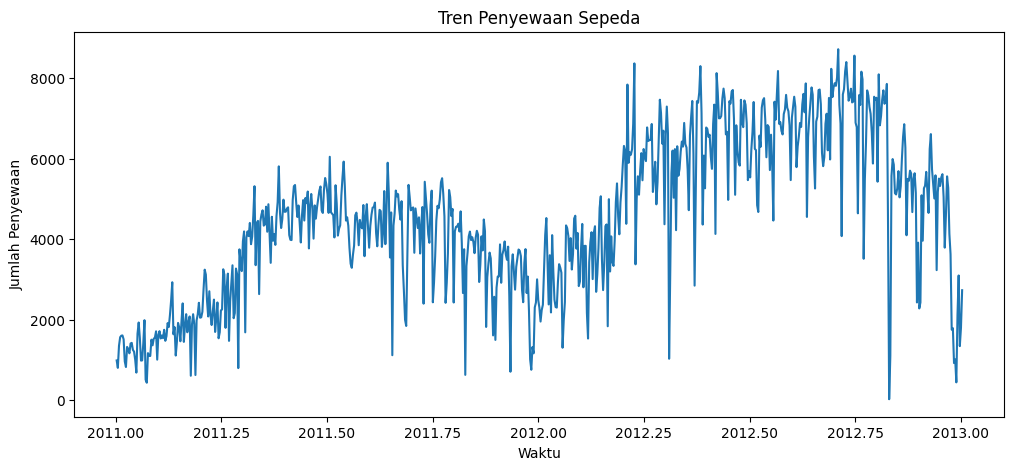

In [174]:
# Hitung rata-rata penyewaan sepeda berdasarkan kelompok suhu
df_dteday = df_numDay.groupby("dteday_float",observed=True)[["cnt","registered", "casual"]].mean().round()

df_numDay.set_index("dteday_float", inplace=True)  # Pastikan datetime sebagai index
df_numDay["cnt"].plot(figsize=(12, 5), title="Tren Penyewaan Sepeda", xlabel="Waktu", ylabel="Jumlah Penyewaan")
plt.show()

Kelompokkan data berdasarkan musim, hitung rata-rata penyewaan, ubah indeks ke nama musim, lalu plot sebagai bar chart.  

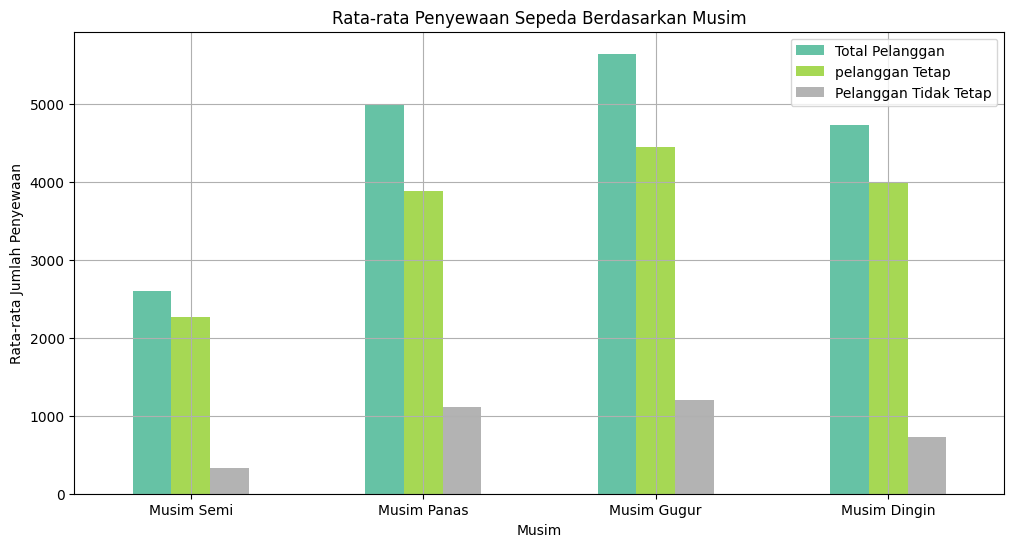

In [175]:
# Hitung rata-rata penyewaan sepeda berdasarkan kelompok suhu
df_season = df_numDay.groupby("season",observed=True)[["cnt","registered", "casual"]].mean().round()

season_labels = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin",
}
df_season.index = df_season.index.map(season_labels)


df_season.plot(kind="bar", colormap="Set2", figsize=(12, 6), rot=0, grid=True)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan","pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()

Kelompokkan data berdasarkan hari kerja/libur, hitung rata-rata penyewaan, ubah indeks ke label hari, lalu plot sebagai bar chart.

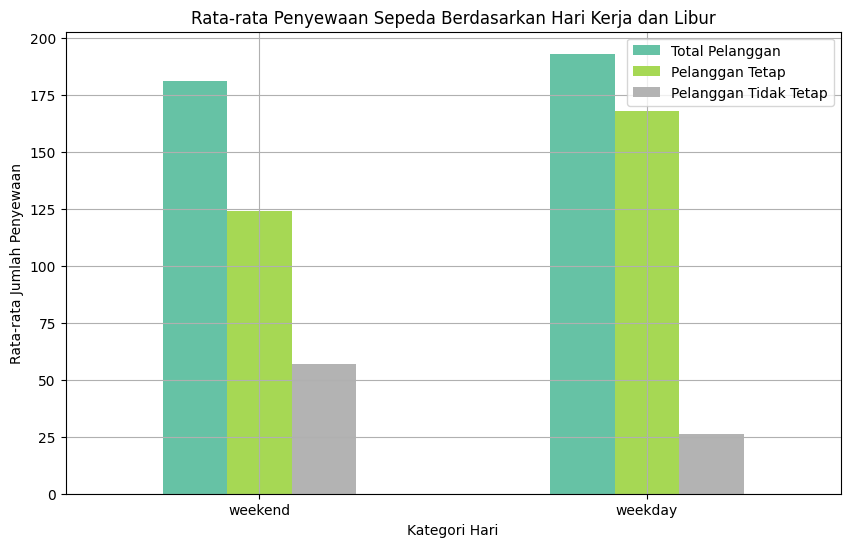

In [176]:
df_workingday = df_numHour.groupby("workingday", observed=True)[["cnt", "registered", "casual"]].mean().round()

day_labels = {1: "weekday", 0: "weekend"}
df_workingday.index = df_workingday.index.map(day_labels)

df_workingday.plot(kind="bar", colormap="Set2", figsize=(10, 6), rot=0, grid=True)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Libur")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan", "Pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()


Kelompokkan data berdasarkan hari, hitung rata-rata penyewaan, ubah indeks ke nama hari, lalu plot sebagai bar chart.

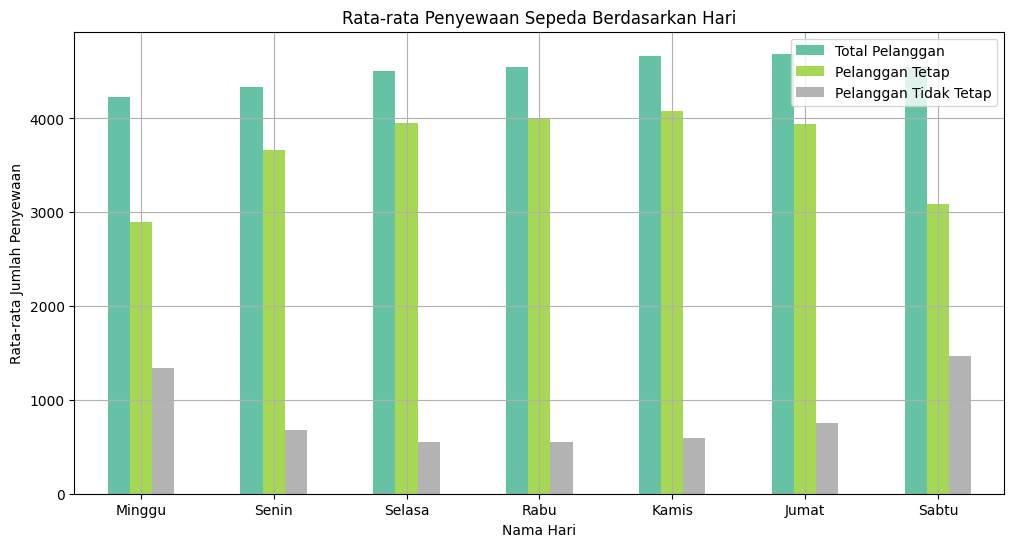

In [177]:
df_week = df_numDay.groupby("weekday",observed=True)[["cnt","registered", "casual"]].mean().round()

days_labels = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

df_week.index = df_week.index.map(days_labels)

df_week.plot(kind="bar", colormap="Set2", figsize=(12, 6), rot=0, grid=True)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Nama Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan", "Pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()

Kelompokkan data berdasarkan jam, hitung rata-rata penyewaan, lalu plot sebagai bar chart.

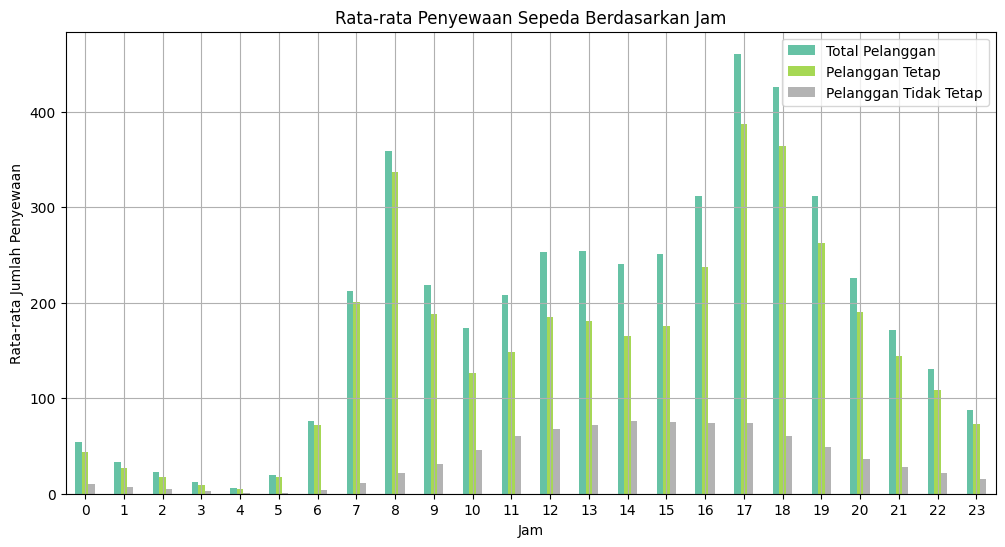

In [178]:
df_hour = df_numHour.groupby("hr", observed=True)[["cnt", "registered", "casual"]].mean().round()

df_hour.plot(kind="bar", colormap="Set2", figsize=(12, 6), rot=0, grid=True)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(["Total Pelanggan", "Pelanggan Tetap", "Pelanggan Tidak Tetap"])
plt.show()


Pisahkan data berdasarkan hari kerja/libur, hitung rata-rata penyewaan per jam, lalu visualisasikan dalam dua subplot.  

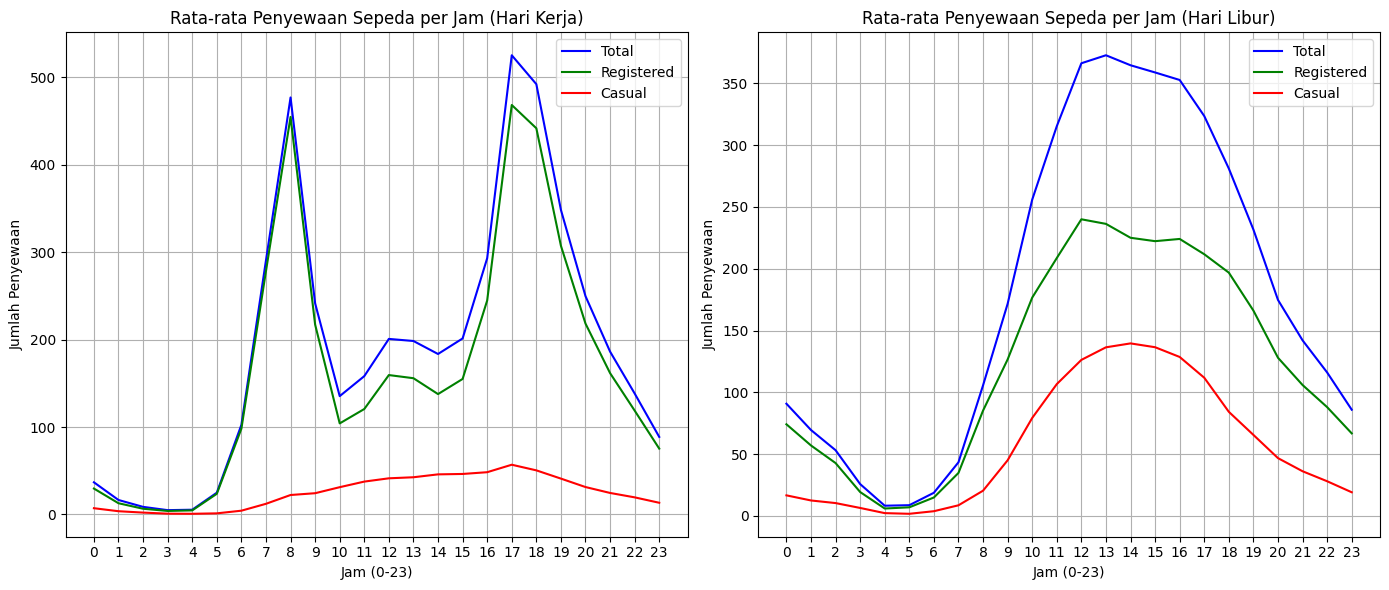

In [179]:
# Pisahkan data berdasarkan workingday
df_working = df_numHour[df_numHour["workingday"] == 1].groupby("hr")[["cnt", "registered", "casual"]].mean()
df_nonworking = df_numHour[df_numHour["workingday"] == 0].groupby("hr")[["cnt", "registered", "casual"]].mean()

# Buat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Hari Kerja (Working Day) ---
sns.lineplot(x=df_working.index, y=df_working["cnt"], label="Total", color="blue", ax=axes[0])
sns.lineplot(x=df_working.index, y=df_working["registered"], label="Registered", color="green", ax=axes[0])
sns.lineplot(x=df_working.index, y=df_working["casual"], label="Casual", color="red", ax=axes[0])

axes[0].set_title("Rata-rata Penyewaan Sepeda per Jam (Hari Kerja)")
axes[0].set_xlabel("Jam (0-23)")
axes[0].set_ylabel("Jumlah Penyewaan")
axes[0].set_xticks(range(0, 24, 1))  # Menampilkan label tiap 1 jam
axes[0].grid(True)

# --- Plot 2: Hari Libur (Non-Working Day) ---
sns.lineplot(x=df_nonworking.index, y=df_nonworking["cnt"], label="Total", color="blue", ax=axes[1])
sns.lineplot(x=df_nonworking.index, y=df_nonworking["registered"], label="Registered", color="green", ax=axes[1])
sns.lineplot(x=df_nonworking.index, y=df_nonworking["casual"], label="Casual", color="red", ax=axes[1])

axes[1].set_title("Rata-rata Penyewaan Sepeda per Jam (Hari Libur)")
axes[1].set_xlabel("Jam (0-23)")
axes[1].set_ylabel("Jumlah Penyewaan")
axes[1].set_xticks(range(0, 24, 1))  # Menampilkan label tiap 3 jam
axes[1].grid(True)

# Atur layout agar tidak bertabrakan
plt.tight_layout()
plt.show()


**Insight Waktu Terbaik untuk Menambah Sepeda dan Menjalankan Promosi**  

1. **Jam Sibuk sebagai Fokus Penambahan Sepeda**  
   - Pada hari kerja, lonjakan penyewaan terjadi pada **07:00 - 09:00** (pagi) dan **16:00 - 19:00** (sore) karena mobilitas pekerja.  
   - Pada akhir pekan, lonjakan terjadi **antara pukul 10:00 - 17:00**, didominasi oleh pengguna kasual untuk aktivitas rekreasi.  
   - **Aksi:** Tambahkan jumlah sepeda di lokasi strategis seperti area perkantoran dan stasiun pada hari kerja, serta area wisata atau rekreasi pada akhir pekan.  

2. **Musim Panas & Gugur sebagai Periode Tinggi Penyewaan**  
   - Musim panas dan gugur mencatat jumlah penyewaan tertinggi dibandingkan musim lainnya.  
   - Musim dingin memiliki tingkat penyewaan lebih rendah, tetapi tetap ada potensi pasar.  
   - **Aksi:**  
     - Tambahkan sepeda menjelang musim panas dan gugur untuk mengakomodasi peningkatan permintaan.  
     - Jalankan promosi diskon atau paket langganan saat musim dingin untuk menjaga permintaan.  

3. **Strategi Promosi Berdasarkan Jenis Pengguna**  
   - **Hari kerja:** Pengguna terdaftar mendominasi, sehingga promosi dapat difokuskan pada **paket langganan atau benefit tambahan untuk pelanggan tetap**.  
   - **Akhir pekan:** Pengguna kasual lebih aktif, sehingga promosi berbasis **diskon, referral, atau bundling dengan layanan lain (misalnya kafe, wisata, atau acara komunitas)** lebih efektif.  
   - **Aksi:**  
     - Berikan promo **diskon di jam non-sibuk** untuk meningkatkan penyewaan di luar jam puncak.  
     - Adakan **event bersepeda komunitas** pada akhir pekan untuk menarik lebih banyak pengguna kasual.  


## Conclusion

###1.Faktor apa yang mempengaruhi jumlah penyewaan sepeda (cnt)?
- Faktor utama yang meningkatkan jumlah penyewaan sepeda adalah **jumlah pengguna terdaftar, penyewa kasual, suhu yang nyaman, dan waktu (terutama jam sibuk serta tren tahunan)**.

- **Cuaca buruk (hujan atau kabut) dan hari libur** memiliki **dampak negatif** terhadap penyewaan sepeda. Korelasi negatif menunjukkan hubungan terbalik yang cukup kuat pada skala harian, faktor ini dapat mengurangi permintaan penyewaan.

- Ada perbedaan pola antara skala **hour (jam)** dan **day (hari)**:
  - **Pada level jam**, penyewaan sangat dipengaruhi oleh waktu tertentu seperti jam sibuk pagi dan sore.
  - **Pada level hari**, tren tahunan dan suhu memiliki pengaruh yang lebih besar, mencerminkan pola jangka panjang dan perubahan musiman.

- Pengguna terdaftar memainkan peran dominan dalam total penyewaan, menunjukkan pentingnya mempertahankan dan meningkatkan basis pelanggan tetap untuk menjaga volume penyewaan.

#### 2.Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
- **Cuaca cerah dan suhu yang hangat (28-34°C) adalah kondisi paling ideal untuk penyewaan sepeda.**
- **Musim panas dan gugur memiliki jumlah penyewaan tertinggi, sementara musim dingin memiliki jumlah penyewaan terendah.**
- **Cuaca buruk seperti hujan deras, salju, dan angin kencang berdampak negatif terhadap jumlah penyewaan.**
- **Kelembapan optimal berada dalam rentang 17-42%.** Di atas 58%, jumlah penyewaan menurun

#### 3.Bagaimana berdasarkan pola penyewaan registered dan casual?

#####a. Pelanggan Registered (Tetap)
- Hari Terbaik → Hari kerja (Senin - Jumat)
- Jam Terbaik → Pagi (07:00 - 09:00) dan Sore (17:00 - 19:00) (dihari kerja)
- Musim Terbaik → Musim Semi (Spring), Musim Panas (Summer), dan Musim Gugur (Autumn)
- Musim Dingin (Winter) → Penyewaan turun drastis, tapi pelanggan tetap masih menyewa.
- Tanggal Terbaik → Hari kerja pada bulan-bulan musim semi dan gugur (April - Juni, September - Oktober).

**Kesimpulan untuk Registered:**

Pelanggan tetap menggunakan sepeda sebagai alat transportasi utama di hari kerja, terutama pagi dan sore untuk pergi dan pulang kerja. Mereka konsisten sepanjang tahun, kecuali di musim dingin.


#####b. Pelanggan Casual (Tidak Tetap)
- Hari Terbaik → Akhir pekan (Sabtu & Minggu) dan hari libur nasional
- Jam Terbaik → Siang hingga sore (10:00 - 17:00) (dihari libur)
- Musim Terbaik → Musim Panas (Summer) dan Musim Semi (Spring)
- Puncak penyewaan casual terjadi di musim panas, terutama saat liburan sekolah.
- Tanggal Terbaik → Akhir pekan selama musim panas (Juli - Agustus) dan musim semi (April - Mei).

**Kesimpulan untuk Casual:**

Pelanggan casual cenderung menyewa sepeda untuk rekreasi, sehingga mereka aktif di akhir pekan dan hari libur. Mereka lebih banyak muncul di musim panas dan musim semi, terutama pada siang hingga sore hari.


